In [142]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression

directory = '/kaggle/input/spaceship-titanic-in-all-probability/train.csv' 
df=pd.read_csv(directory)


In [10]:
# Step 2: Separate numerical and nominal variables and removing the label column from them if they have it in the subset
label_column = df.columns[-1]
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.difference([label_column])
nominal_columns = df.select_dtypes(include=['object']).columns.difference([label_column])

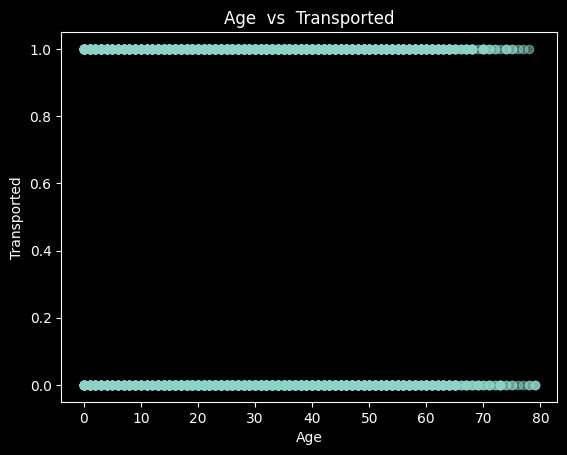

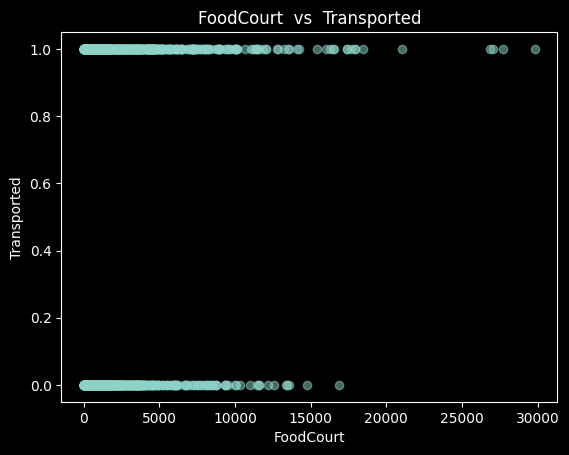

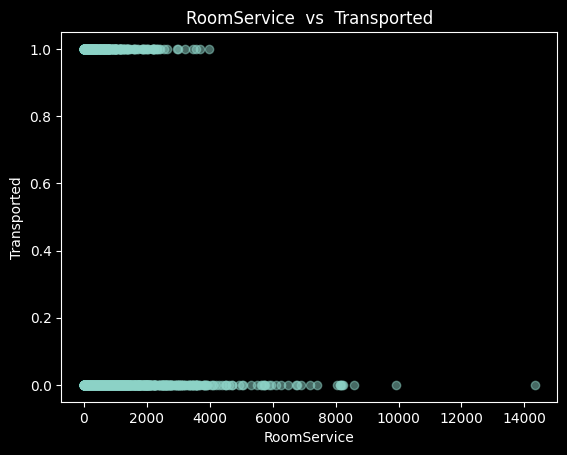

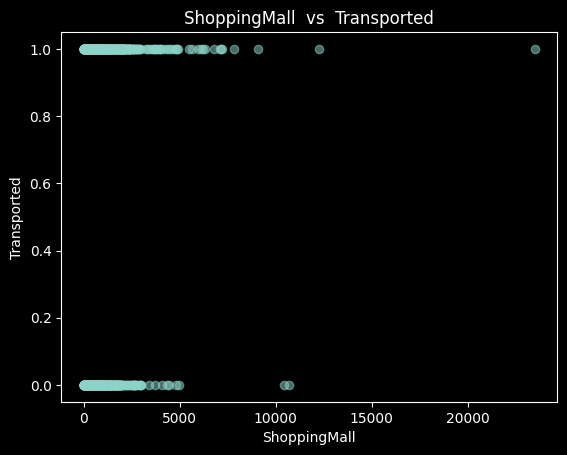

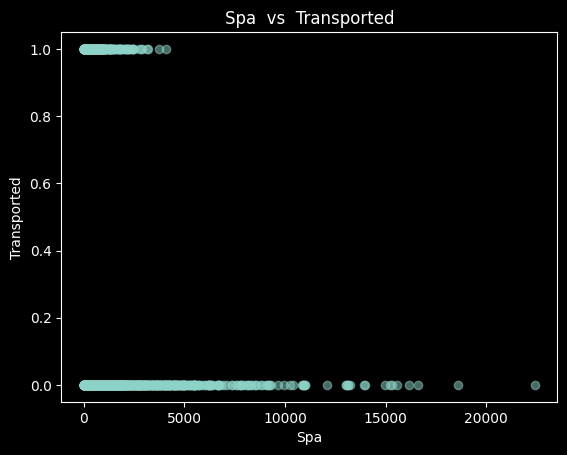

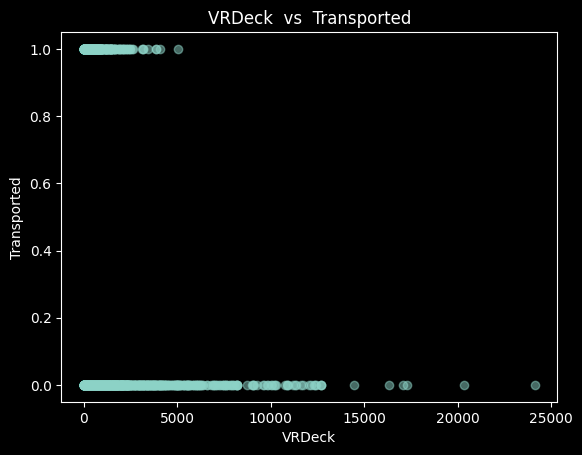

In [4]:
# Step 3: Compare numerical variables with the label and plot graphs

for num_column in numerical_columns:
    plt.style.use('dark_background')
    plt.scatter(df[num_column], df[label_column], alpha=0.5)
    plt.title(num_column + '  vs  '+ label_column)
    plt.xlabel(num_column)
    plt.ylabel(label_column)
    plt.show()




In [143]:
def preprocess_numerical_columns(df,numerical_columns):
    # Extract numerical columns
    numerical_data = df[numerical_columns]

    # Impute missing values with mean
    imputer = SimpleImputer(strategy='median')
    numerical_data_imputed = pd.DataFrame(imputer.fit_transform(numerical_data), columns=numerical_columns)

    # Standardize the numerical features
    scaler = StandardScaler()
    numerical_data_scaled = pd.DataFrame(scaler.fit_transform(numerical_data_imputed), columns=numerical_columns)

    return numerical_data_scaled

In [144]:
# Step 7: Split data into features (X) and target (y), and then into training and testing sets
X=preprocess_numerical_columns(df,numerical_columns)
y = df[label_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001)

In [145]:
model=LogisticRegression()

In [146]:
# Step 8: Fit the model and make predictions
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred=pd.DataFrame(y_pred,columns=['Transported'])

In [147]:
# Step 9: Evaluate the model
model.score(X_test, y_test)

1.0

Now lets write down the model prediction for test.csv

In [164]:
dirTest='/kaggle/input/spaceship-titanic-in-all-probability/test.csv'
test_data = pd.read_csv(dirTest)

numerical_columns_test=test_data.select_dtypes(include=['float64', 'int64']).columns.difference([label_column])
# Step 6: Transform test data and make predictions
X_test_processed = preprocess_numerical_columns(test_data,numerical_columns_test)  # Assuming the test data has the same features as the training data


In [165]:
X_test_processed

,Age,FoodCourt,RoomService,ShoppingMall,Spa,VRDeck
0,-0.114147,-0.283840,-0.357339,-0.312173,-0.267841,-0.246712
1,-0.684313,-0.277879,-0.357339,-0.312173,2.287504,-0.246712
2,0.170937,-0.283840,-0.357339,-0.312173,-0.267841,-0.246712
3,0.669832,4.121518,-0.357339,-0.312173,-0.104002,0.226648
4,-0.613042,-0.283840,-0.340723,0.832122,-0.267841,-0.246712
...,...,...,...,...,...,...
4272,0.384749,-0.283840,-0.357339,-0.312173,-0.267841,-0.246712
4273,0.954916,0.277095,-0.357339,-0.281538,-0.258790,-0.130193
4274,-0.185417,-0.283840,-0.357339,-0.312173,-0.267841,-0.246712
4275,-0.185417,1.491019,-0.357339,-0.312173,-0.267841,0.176479


In [174]:
predicted_labels = model.predict_proba(X_test_processed)[:,1]

# Step 7: Create a DataFrame with the predicted labels
predicted_labels

array([0.67565026, 0.00250495, 0.67784916, ..., 0.67509932, 0.8501621 ,
       0.68439849])

In [175]:
predicted = pd.DataFrame({'Transported': predicted_labels})

result_df=pd.concat([test_data['PassengerId'],predicted],axis='columns')

# Step 8: Write the result to a new CSV file  # Update this with your desired file path
result_df


,PassengerId,Transported
0,0013_01,0.675650
1,0018_01,0.002505
2,0019_01,0.677849
3,0021_01,0.985287
4,0023_01,0.694150
...,...,...
4272,9266_02,0.679493
4273,9269_01,0.752100
4274,9271_01,0.675099
4275,9273_01,0.850162


In [176]:
result_df.to_csv('/kaggle/working/prediction.csv')